# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

## Task 1

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [12]:
    # What I came up with initially
# import pandas as pd
# df = pd.read_json('C:/Users/cmagann/Desktop/GA_DS/Fork/ds-dc-23/2_dataset/yelp.json', orient="records", lines = True)

In [13]:
# df.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"


In [121]:
import json
import pandas as pd
with open('C:/Users/cmagann/Desktop/GA_DS/Fork/ds-dc-23/2_dataset/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]
df = pd.io.json.json_normalize(data)

In [73]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes.cool,votes.funny,votes.useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5


In [122]:
# Rename columns
df.columns = df.columns.str.replace('votes.','')
df.columns = df.columns.str.replace('review_id','revid')
df.columns = df.columns.str.replace('business_id','bizid')
df.columns = df.columns.str.replace('user_id','uid')

In [59]:
df.head(1)

,bizid,date,revid,stars,text,type,uid,cool,funny,useful
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5


In [70]:
df.columns.values

array([u'bizid', u'date', u'revid', u'stars', u'text', u'type', u'uid',
       u'cool', u'funny', u'useful'], dtype=object)

In [18]:
df.shape

(10000, 10)

In [19]:
df.dtypes

bizid     object
date      object
revid     object
stars      int64
text      object
type      object
uid       object
cool       int64
funny      int64
useful     int64
dtype: object

In [123]:
df['date'] = pd.to_datetime(df['date'],errors = 'coerce',infer_datetime_format = True)

In [61]:
df.dtypes

bizid             object
date      datetime64[ns]
revid             object
stars              int64
text              object
type              object
uid               object
cool               int64
funny              int64
useful             int64
dtype: object

In [22]:
df.columns

Index([u'bizid', u'date', u'revid', u'stars', u'text', u'type', u'uid',
       u'cool', u'funny', u'useful'],
      dtype='object')

## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [63]:
df.stars.isnull().sum()

0

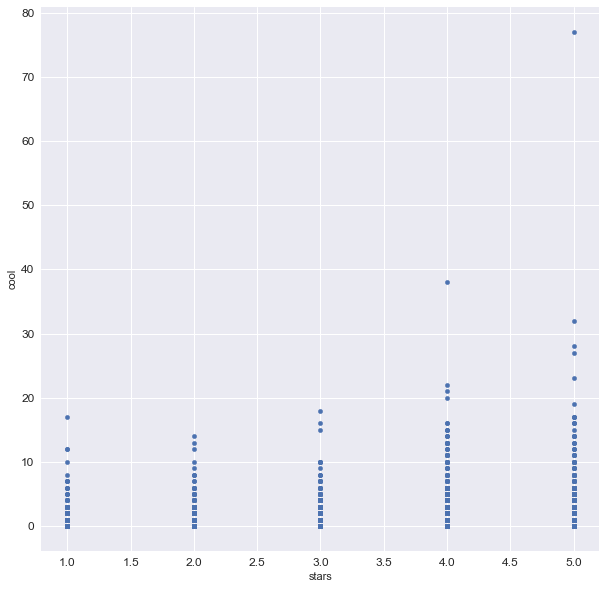

In [28]:
# treat stars as a categorical variable and look for differences between groups
df.plot(x='stars',y='cool',kind='scatter', figsize=(10,10), fontsize=12)

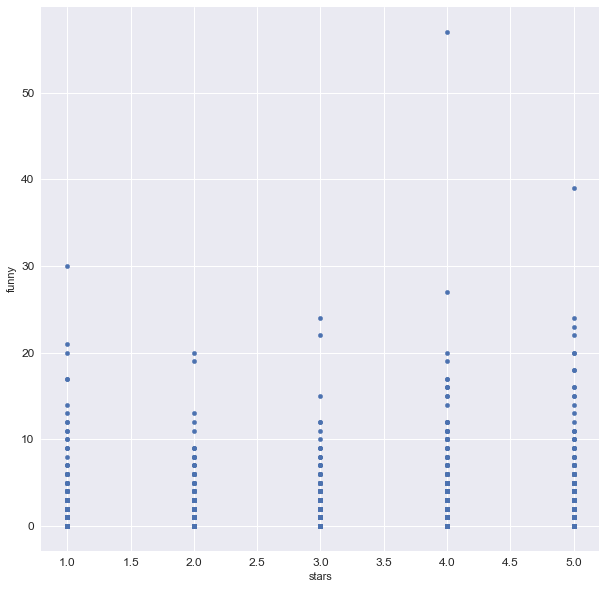

In [29]:
df.plot(x='stars',y='funny',kind='scatter', figsize=(10,10), fontsize=12)

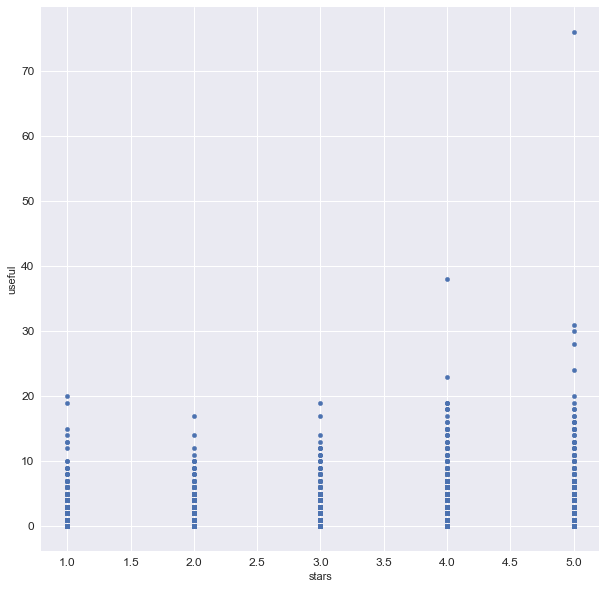

In [30]:
df.plot(x='stars',y='useful',kind='scatter', figsize=(10,10), fontsize=12)

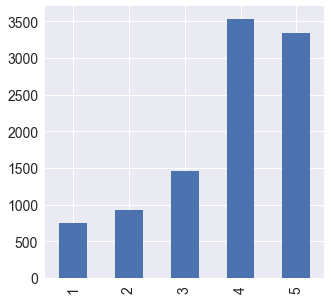

In [19]:
df.stars.value_counts().sort_index().plot(kind='bar', figsize=(5,5), fontsize=14)

In [31]:
df.stars.describe()

count    10000.000000
mean         3.777500
std          1.214636
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [32]:
df.groupby('stars').mean()

,cool,funny,useful
stars,,,
1,0.576769,1.056075,1.604806
2,0.719525,0.875944,1.563107
3,0.788501,0.694730,1.306639
4,0.954623,0.670448,1.395916
5,0.944261,0.608631,1.381780


In [33]:
# correlation matrix
%matplotlib inline
df.corr()

,stars,cool,funny,useful
stars,1.000000,0.052555,-0.061306,-0.023479
cool,0.052555,1.000000,0.764342,0.887102
funny,-0.061306,0.764342,1.000000,0.723406
useful,-0.023479,0.887102,0.723406,1.000000


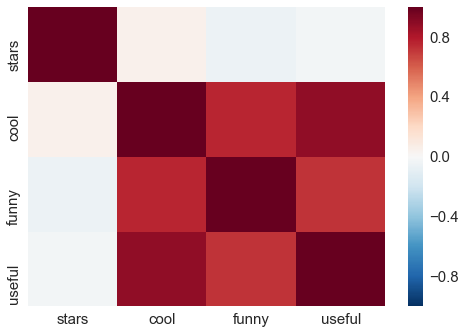

In [34]:
sns.set(font_scale = 1.5)
sns.heatmap(df.corr())

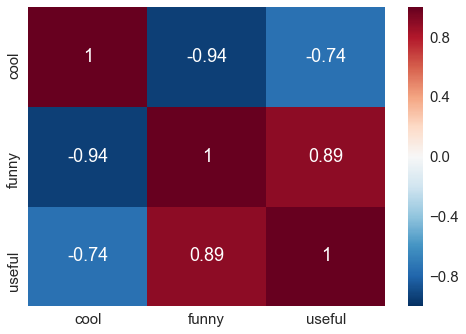

In [92]:
# method mean
stars = df.groupby('stars').mean()
stars.corr()
sns.set(font_scale = 1.5)
sns.heatmap(data=stars.corr(), annot = True)

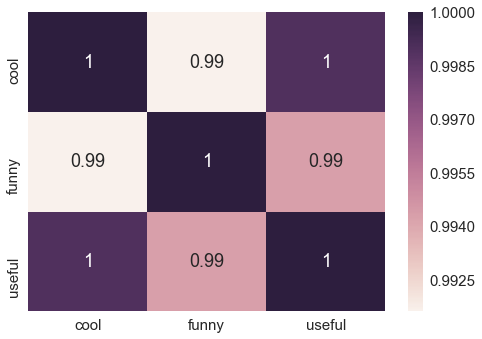

In [89]:
# method sum
stars = df.groupby('stars').sum()
stars.corr()
sns.set(font_scale = 1.5)
sns.heatmap(data=stars.corr(), annot = True)

## Task 3

Define cool/useful/funny as the features, and stars as the response.

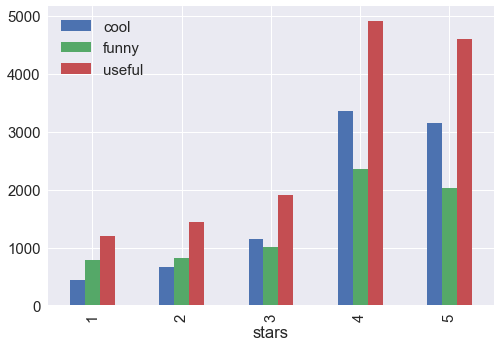

In [28]:
stars = df.groupby('stars').sum()
stars.plot(kind = 'bar')
sns.set(font_scale = 1.5)

In [49]:
# misunderstood task 3 until I read task 4 :)

In [65]:
group = ['cool', 'useful', 'funny']
X = df[group]
y = df.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [66]:
from sklearn import linear_model

In [119]:
df = linear_model.LinearRegression(fit_intercept = True)
df.fit(X, y)
df_pred = df.predict(X)
df_residuals = y-df.predict(X)

In [68]:
df_residuals.mean()

-2.281730360209622e-16

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   5.04000000e+02,   1.10300000e+03,
          1.80900000e+03,   3.87200000e+03,   2.70800000e+03,
          3.00000000e+00]),
 array([-8.75919216, -7.52105628, -6.2829204 , -5.04478452, -3.80664864,
        -2.56851276, -1.33037688, -0.092241  ,  1.14589488,  2.38403076,
         3.62216664]),
 <a list of 10 Patch objects>)

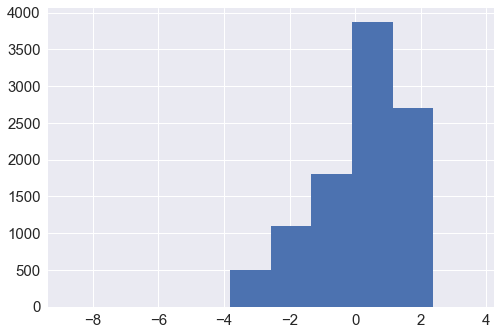

In [69]:
plt.figure()
plt.hist(df_residuals)

In [42]:
df_residuals.describe()

count    1.000000e+04
mean    -2.281730e-16
std      1.187444e+00
min     -8.759192e+00
25%     -8.296168e-01
50%      1.601052e-01
75%      1.160105e+00
max      3.622167e+00
Name: stars, dtype: float64

In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()
lr.fit(X, y)
zip(group, lr.coef_)

[('cool', 0.27435946858853061),
 ('useful', -0.14745239099401478),
 ('funny', -0.13567449053706179)]

In [77]:
df.cool.describe()

count    10000.000000
mean         0.876800
std          2.067861
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         77.000000
Name: cool, dtype: float64

In [78]:
df.useful.describe()

count    10000.000000
mean         1.409300
std          2.336647
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         76.000000
Name: useful, dtype: float64

In [79]:
df.funny.describe()

count    10000.000000
mean         0.701300
std          1.907942
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         57.000000
Name: funny, dtype: float64

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [81]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [86]:
    # define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(group):
    X = df[group]
    # y = df.total
    y = df.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [87]:
    # calculate RMSE with all three features
print(train_test_rmse(['cool', 'useful', 'funny']))
# close to 1, all right!

1.17336862742


## Task 6

Try removing some of the features and see if the RMSE improves.

In [88]:
print(train_test_rmse(['useful', 'funny']))

1.20070113589


In [90]:
print(train_test_rmse(['cool', 'funny']))

1.1851949299


In [91]:
print(train_test_rmse(['cool', 'useful']))

1.18537944234


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [97]:
df.columns.values

array([u'bizid', u'date', u'revid', u'stars', u'text', u'type', u'uid',
       u'cool', u'funny', u'useful'], dtype=object)

In [102]:
    # new feature: review length (number of characters)
# df['text length'] = df['text'].apply
df['text length'] = df['text'].apply(len)

In [103]:
df.head(1)

,bizid,date,revid,stars,text,type,uid,cool,funny,useful,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5,889


In [141]:
    # new features: whether or not the review contains 'love' or 'hate'
df.text = df.text.str.lower()
df[df.text.str.contains('love') == True]
df[df.text.str.contains('hate') == True]

,bizid,date,revid,stars,text,type,uid,cool,funny,useful
41,qsThMZ3lXWYLN4t08ScsNA,2009-03-13,fuY6Bf4EtW3UwrdLQJa9_Q,4,i really really like frances. i love most of ...,review,W_QXYA7A0IhMrvbckz7eVg,2,1,2
56,tA2DT7CGQPzgA6tTcTkXDw,2009-09-02,VyX6x7wnThr9g9Z6VBDIgA,2,i have to add to andrew's review.....\n\ni jus...,review,UL9chyH0a4Pj8J_9M6WSpA,1,2,2
147,MLPUSpkbWAvr9gJOELKqmQ,2011-03-24,hQUn4oL-6qnjma8indhLNw,2,went here for the first time a few weeks ago. ...,review,nH0YyEYTE7RMeAbeERrSQA,1,1,2
188,pdxyZdnwltQXcu-kD5rpXQ,2007-01-22,kUw0d4RX-tp32zmP-XwkXw,5,screw disneyland- sephora is the happiest plac...,review,0CMz8YaO3f8xu4KqQgKb9Q,0,4,0
212,yPJFfglhMHAKciUpjTmgBg,2011-12-27,TkTbb-JkRsdtD5wplSGEtw,1,i had not been to an oregano's in like 10 year...,review,KucBnMrhalzxnD9AWrxwYQ,2,0,4
289,l3yL2rQ6PoFBQ06RLczn9w,2010-08-21,Cluf-ijd2Ubr0hoVjLXoSQ,1,i'd say i've been to the clubhouse a few times...,review,80PHOfM8KOBb7xEQN4C0lg,0,0,0
304,B8ujMtvvpHyEQ2r_QlAT2w,2009-02-04,lkXM8gxdU1qQVCHggDfsyQ,4,i didn't pay much attention to this place for ...,review,zsBmBMbZhPuWKueEyKoI1Q,0,0,0
314,eR_vyBCRhMQKhmHbxFkPVw,2008-12-11,yt_CpzmwoSv3NPGNcHzI-w,4,so wednesday evening i needed milk and cat foo...,review,Ps1Db9zOatoF_76FZNO5CQ,0,0,3
382,IVc23uY-36WUNYoIbz42Fg,2012-12-13,ig5kYd1TvqHtnDu_AJH13g,5,i had the best culinary experience of my 8 yea...,review,aB_1_t8nAUHkS2nAFxcW0A,1,2,1
401,OOCLVeqqMFfSnKa7liv0Kw,2012-11-04,9NrXM5p0sssVJiVgvFmwdw,4,this is an open-air mall. unlike most malls w...,review,Mb0psF4WQF7gZSuZafVr-g,0,0,0


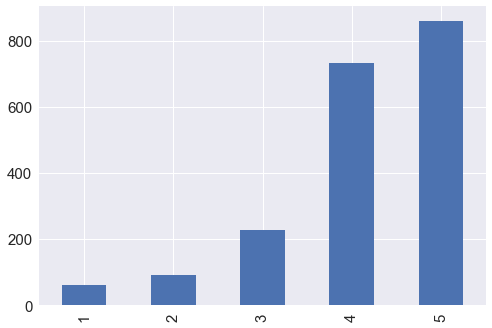

In [117]:
df[df.text.str.contains('love')].stars.value_counts().sort_index().plot(kind='bar')

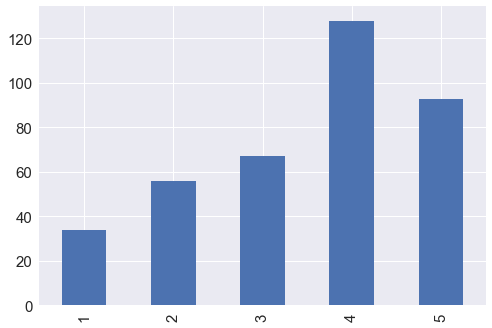

In [118]:
df[df.text.str.contains('hate')].stars.value_counts().sort_index().plot(kind='bar')

In [152]:
    # add new features to the model and calculate RMSE
df['text_love'] = df.text.str.contains('love')
df['text_hate'] = df.text.str.contains('hate')

In [154]:
df.head(10)

,bizid,date,revid,stars,text,type,uid,cool,funny,useful,text_love,text_hate
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5,False,False
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,False,False
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. rice is so good and i als...,review,0hT2KtfLiobPvh6cDC8JQg,0,0,1,True,False
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"rosie, dakota, and i love chaparral dog park!!...",review,uZetl9T0NcROGOyFfughhg,1,0,2,True,False
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,False,False
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"quiessence is, simply put, beautiful. full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,1,3,False,False
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what you're doing and drive here. after i...,review,wFweIWhv2fREZV_dYkz_1g,7,4,7,True,False
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"luckily, i didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,0,1,False,False
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,definitely come for happy hour! prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0,False,False
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,0,1,False,False


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [18]:
# split the data (outside of the function)


In [19]:
# create a NumPy array with the same shape as y_test


In [20]:
# fill the array with the mean of y_test

In [21]:
# calculate null RMSE

## Task 9 (Bonus)

Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.

In [22]:
# import and instantiate KNN

In [23]:
# classification models will automatically treat the response value (1/2/3/4/5) as unordered categories

## Task 10 (Bonus)

Figure out how to use linear regression for classification, and compare its classification accuracy with KNN's accuracy.

In [24]:
# use linear regression to make continuous predictions

In [25]:
# round its predictions to the nearest integer

In [26]:
# calculate classification accuracy of the rounded predictions

## Task 1 (Bonus)

Interact with JSON

In [ ]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary using using json.loads()

In [ ]:
# convert the list of dictionaries to a DataFrame

In [ ]:
# add DataFrame columns for cool, useful, and funny

In [ ]:
# drop the votes column